# Linear Regression Assignment [BoomBikes]

BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

#### 1) Which variables are significant in predicting the demand for shared bikes?

#### 2) How well those variables describe the bike demands?

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
#### We are required to model the demand for shared bikes with the available independent variables. 
It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Outline of the assignment
- We will do the following:
    - Phase 1: Data preparation
    - Phase 2: Exploratory Data Analysis and data visualisation
    - Phase 3: Pre-processing the dataset for model building
    - Phase 4: Model building using linear regression
    - Phase 5: Residual analysis and predictions

## PHASE 1 : DATA PREPARATION

#### First we import the necessary libraries, and read the dataset to introduce ourselves to the type of data we need to work with.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#read the dataset (name is chosen as df 'dataframe' as it is easy to work with)
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### We notice that the names of some of the columns, though legible, have some spelling errors. We correct them for better understanding.

In [3]:
#Correcting the column names
df1=df.rename(columns = {'yr':'year', 'mnth':'month', 'hum':'humidity', 'cnt':'count'}, inplace=False)

In [4]:
df1.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#find the current size of the dataset
df1.shape

(730, 16)

In [6]:
# Dropping the duplicates(if any) from the dataset. 
df1.drop_duplicates(subset=None, inplace=True)

In [7]:
# Checking the shape after duplicates are removed. 
df1.shape

(730, 16)

There are no duplicate rows in the dataset as we see that the shape remains the same.

-We look at the first five rows of the dataset to get a feel of the data we will be working with. We notice that the dataset has 730 rows and 16 columns.

-The 'instant' column adds no value to the dataset for analysis, so we will drop it.

-We also see that 'casual' and 'registered' combined form the count column, hence we will not be needing those two columns, so we will drop them as well.

-The 'dteday' column also does not add any value for the purpose of analysis since all the data is available in the month and year columns, thus we drop it. 

In [8]:
#drop columns that add no value to the analysis
df1=df1.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [9]:
#check the size of the dataset again to make sure the columns were dropped
df1.shape

(730, 12)

After the removal of the four columns above, our dataset now has 12 columns.

We also see that some columns have numbers representing categorical data such as season, year, month, weekday and weathersit. This may be counterproductive when creating a model.
It might assume that a higher number has a higher or lower importance than the others when in reality, they are non-ordinal categorical data with each value having equal importance.

Hence, we create dictionaries and map the values to the data in the dataset.

In [10]:
#create mapping dictonaries to convert numerical data that are in effect, categorical
season_dict = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
month_dict = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
weekday_dict = {0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday'}
weathersit_dict = {1:'clear', 2:'mist-cloudy', 3:'light snow-rain', 4:'heavy snow-rain'}

In [11]:
#convert the data from numeric type to categorical for better analysis
df1.season=df1.season.map(season_dict)
df1.month=df1.month.map(month_dict)
df1.weekday=df1.weekday.map(weekday_dict)
df1.weathersit=df1.weathersit.map(weathersit_dict)

In [12]:
#Standardise the temp and atemp columns to 2 decimal places
df1=df1.round({'temp':2, 'atemp':2})

Finally, we check if the changes applied are shown in the dataset before moving to the next step.

In [13]:
#check if the changes applied, are reflected in the dataset
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,spring,0,January,0,Monday,1,mist-cloudy,14.11,18.18,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,mist-cloudy,14.90,17.69,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,clear,8.05,9.47,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,clear,8.20,10.61,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,clear,9.31,11.46,43.6957,12.522300,1600


In [14]:
#check the datatypes for each column and also note the number of null values if present
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


In [15]:
# check the description of the numerical data to see if there are any outliers or logical errors in the data
df1.describe().round(2)

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,0.5,0.03,0.69,20.32,23.73,62.77,12.76,4508.01
std,0.5,0.17,0.46,7.51,8.15,14.24,5.20,1936.01
min,0.0,0.00,0.00,2.42,3.95,0.00,1.50,22.00
25%,0.0,0.00,0.00,13.81,16.89,52.00,9.04,3169.75
50%,0.5,0.00,1.00,20.46,24.37,62.62,12.13,4548.50
75%,1.0,0.00,1.00,26.88,30.44,72.99,15.63,5966.00
max,1.0,1.00,1.00,35.33,42.04,97.25,34.00,8714.00


The description of the dataset shows that all the values are in the acceptable range and there is no logical error in them. We now check if there are any missing values that require treatment from our end.

In [16]:
#check for null values
df1.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

There are no missing or null values in the dataset.

### Summary
- In the data preparation phase
 - We import the required libraries and familiarise ourselves with the dataset
 - We drop the columns that do not add value towards analysing the dataset
 - We map the categorical data represented by numerals into strings
 - We standardise data if needed (e.g. rounding off temp and atemp)
 - We check for logical inconsistencies and outliers if any
 - We check for null or empty values in the dataset if any and treat them

Now the dataset is clean for further analysis.

## PHASE 2: EXPLORATORY DATA ANALYSIS

### Univariate Analysis

#### Categorical columns: 
    - Season
    - Year
    - Month
    - Holiday
    - Weekday
    - Workingday
    - Weathersit

In [17]:
#Days in each season
df1.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

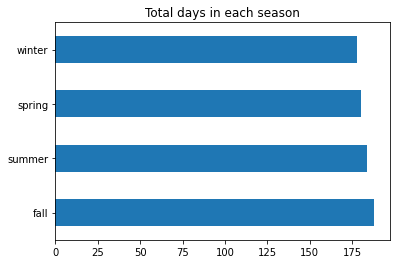

In [18]:
#Days in each season
df1.season.value_counts().plot.barh()
plt.title('Total days in each season')
plt.show()

In [19]:
#How many days in each year do we have the data for? (0 is 2018, 1 is 2019)
df1.year.value_counts()

0    365
1    365
Name: year, dtype: int64

#### This indicates that the data present is for two whole years, 2018 and 2019.

In [20]:
# Number of days in each month over the two years
df1.month.value_counts()

January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: month, dtype: int64

In [21]:
#Number of days in two years that were holidays
df1.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

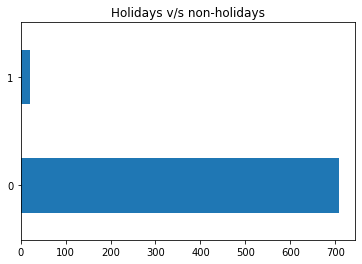

In [22]:
#Number of days in two years that were holidays(1 is 'yes', 0 is 'no')
df1.holiday.value_counts().plot.barh()
plt.title('Holidays v/s non-holidays')
plt.show()

#### There are 21 holidays over the 730 days in the two years of the dataset.

In [23]:
#How many times does each week day occur over the timeline of the dataset.
df1.weekday.value_counts()

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64

In [24]:
# Number of working days over the timeline of the dataset (1 is 'yes', 0 is 'no')
df1.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

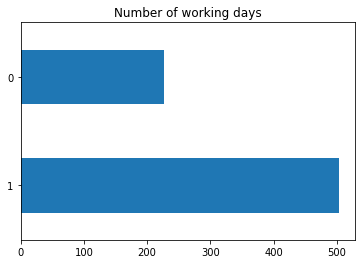

In [25]:
# Plot for number of working days
df1.workingday.value_counts().plot.barh()
plt.title('Number of working days')
plt.show()

#### There are 504 working days in the two years combined.

In [26]:
# Days with each type of weather situation over the timeline of the dataset
df1.weathersit.value_counts()

clear              463
mist-cloudy        246
light snow-rain     21
Name: weathersit, dtype: int64

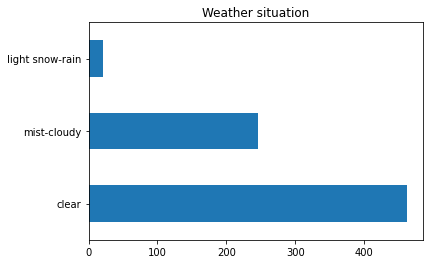

In [27]:
# Plot for days with each type of weather situation over the timeline of the dataset
df1.weathersit.value_counts().plot.barh()
plt.title('Weather situation')
plt.show()

#### Business takeaway: One thing to note here is that none of the data has 'heavy rain' as its weather situation. This either means that Boombikes does not allow rentals during heavy rains, or that customers do not use the service in heavy rains, or that the region has not received heavy rains for the timeline of the dataset. 

#### Technical takeaway: From an analysis perspective, during the dummy creation, we can skip heavy rain and only use the three values mentioned here.

#### Numerical data: 
    - Temp
    - Atemp 
    - Humidity
    - Windspeed
    - Count(Target variable)

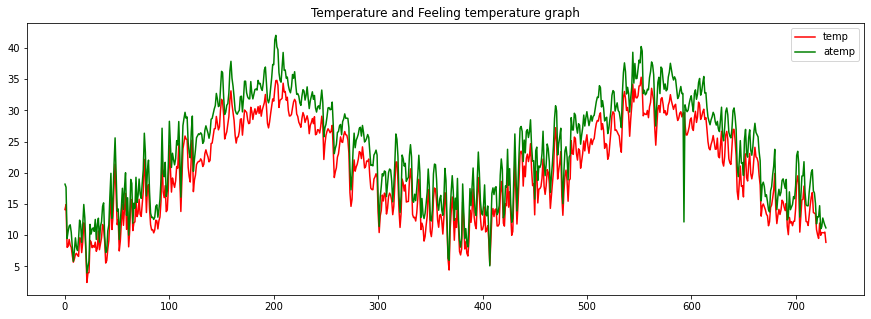

In [28]:
#Temperature and feeling temperature
plt.figure(figsize=[15,5])
plt.plot(df1.temp, color = 'red')
plt.plot(df1.atemp, color = 'green')
plt.legend(['temp', 'atemp'])
plt.title('Temperature and Feeling temperature graph')
plt.show()

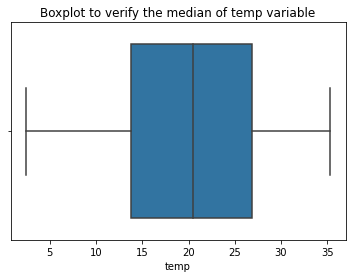

In [29]:
#Verifying the median of the temp variable
sns.boxplot(df1.temp)
plt.title('Boxplot to verify the median of temp variable')
plt.show()

#### The median temperature is close to 20 degrees Celsius.

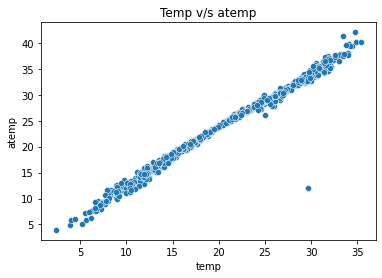

In [30]:
sns.scatterplot(df1.temp, df1.atemp)
plt.title('Temp v/s atemp')
plt.show()

#### This overlapped line graph and a linear scatter plot are a clear indication that 'temp' and 'atemp' are highly correlated. It makes sense that on days where the actual temperature is high, the feeling temperature is high too and vice versa. We can drop one of the columns since they give the same information. Just to be sure of this before dropping, we will also see their relationship in pairplots, correlation matrix and heatmap.

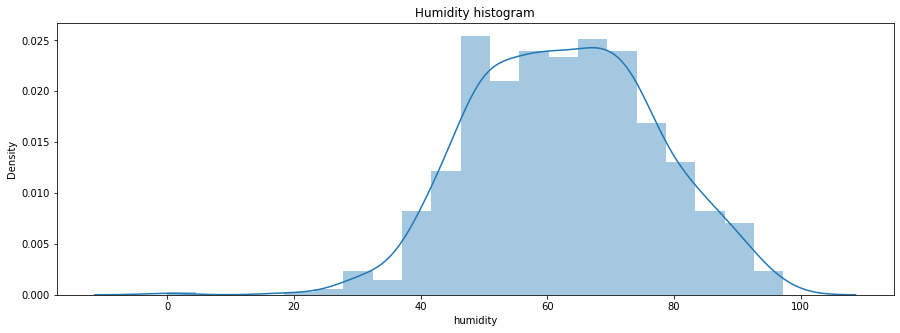

In [31]:
plt.figure(figsize=[15,5])
sns.distplot(df1.humidity)
plt.title('Humidity histogram')
plt.show()

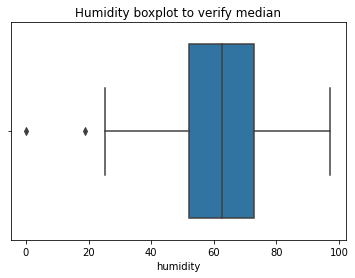

In [32]:
sns.boxplot(df1.humidity)
plt.title('Humidity boxplot to verify median')
plt.show()

#### Most days, humidity is between 40 and 80 percent, with medain around 63 percent.

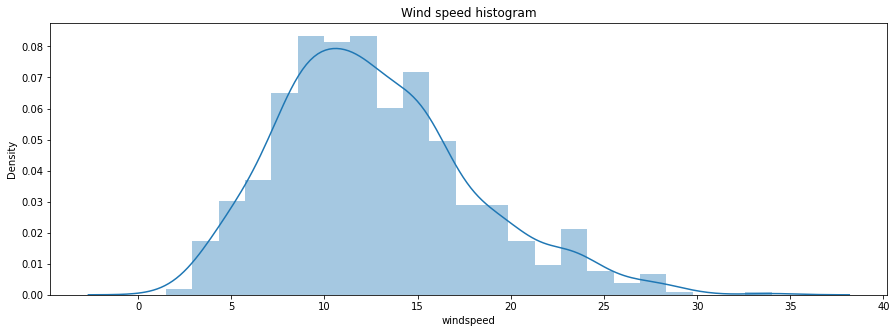

In [33]:
plt.figure(figsize=[15,5])
sns.distplot(df1.windspeed)
plt.title('Wind speed histogram')
plt.show()

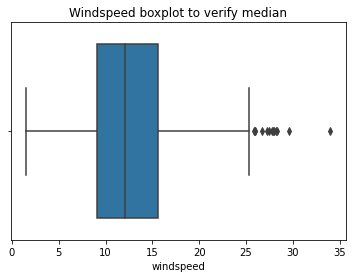

In [34]:
sns.boxplot(df1.windspeed)
plt.title('Windspeed boxplot to verify median')
plt.show()

#### Most days, wind speed is between 5kmph and 20kmph with a median around 12kmph.

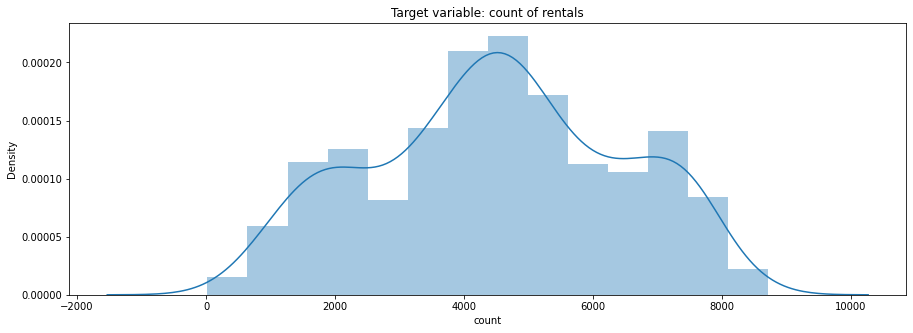

In [35]:
plt.figure(figsize=[15,5])
sns.distplot(df1['count'])
plt.title('Target variable: count of rentals')
plt.show()

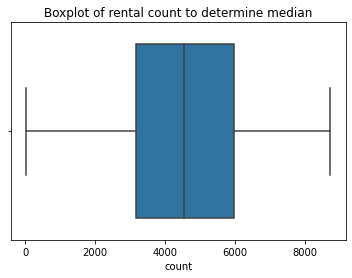

In [36]:
sns.boxplot(df1['count'])
plt.title('Boxplot of rental count to determine median')
plt.show()

#### Technical takeaway: The boxplot and distplot show that the median number of rentals on any given day is approximately 4500, which can be verified from the describe() function where the exact value is 4548.
#### Business takeaway: An average expected value of daily rentals can be close to 4500. The business might need to make sure that on an average, 4500 bookings are made.

## Bivariate and multivariate analysis

#### For bivariate and multivariate anaylsis, we will look at boxplots of cateogorical variables and pairplots of numeric variables which will give us a summary of the relationship between any two variables/columns.

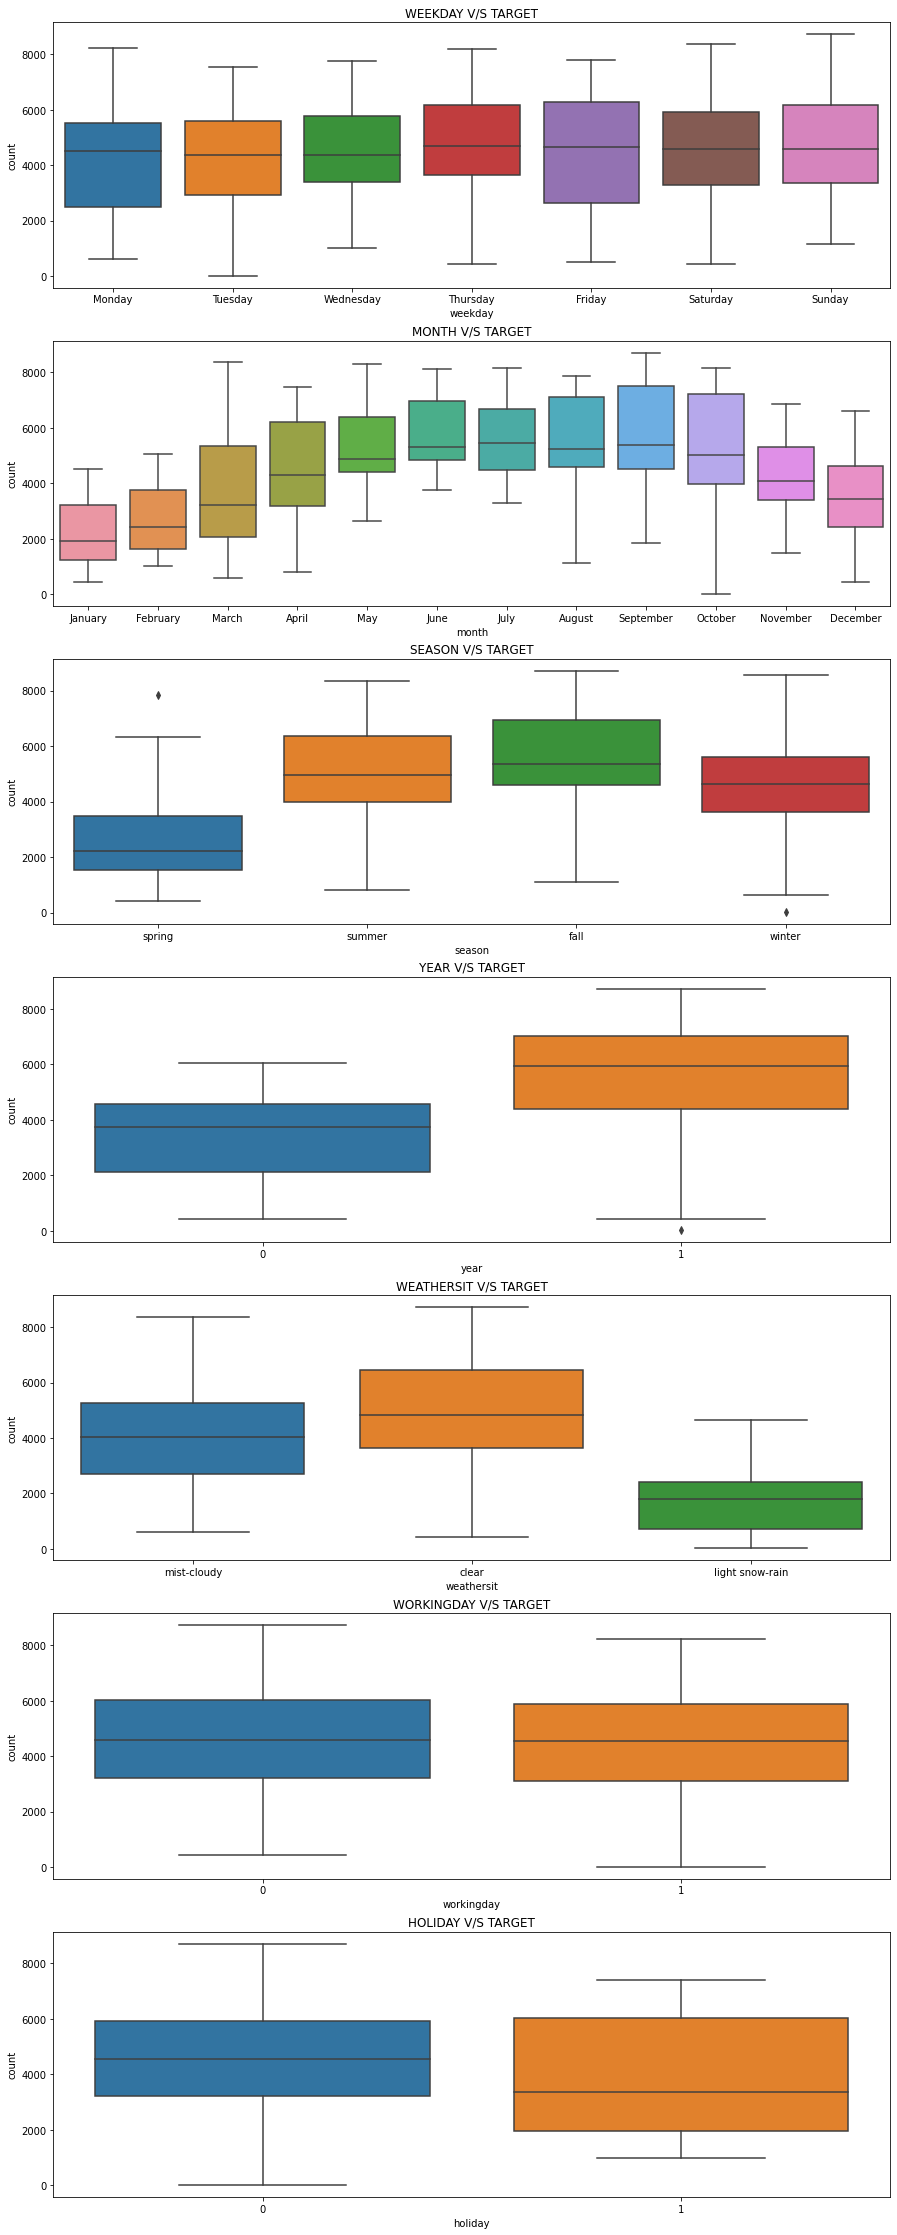

In [37]:
#Analysing boxplots of categorical variables against the target variable
plt.figure(figsize=[15,40])
plt.subplot(7,1,1)
sns.boxplot(df1.weekday, df1['count'])
plt.title('WEEKDAY V/S TARGET')
plt.subplot(7,1,2)
sns.boxplot(df1.month, df1['count'])
plt.title('MONTH V/S TARGET')
plt.subplot(7,1,3)
sns.boxplot(df1.season, df1['count'])
plt.title('SEASON V/S TARGET')
plt.subplot(7,1,4)
sns.boxplot(df1.year, df1['count'])
plt.title('YEAR V/S TARGET')
plt.subplot(7,1,5)
sns.boxplot(df1.weathersit, df1['count'])
plt.title('WEATHERSIT V/S TARGET')
plt.subplot(7,1,6)
sns.boxplot(df1.workingday, df1['count'])
plt.title('WORKINGDAY V/S TARGET')
plt.subplot(7,1,7)
sns.boxplot(df1.holiday, df1['count'])
plt.title('HOLIDAY V/S TARGET')
plt.show()

#### We notice from these boxplots:
#### 1. The median rentals are almost similar across all days of the week, thus workingday or weekend have a similar distribution.
#### 2. We see a higher bulk of the usage during the summer and fall months as compared to winter and spring.
#### 3. This is again seen in the boxplots of seasons, that fall has the highest number of rentals followed by summer.
#### 4. The rentals have been considerably higher in 2019 than in 2018, which indicates that the service is being used more. The business should upscale accordingly.
#### 5. Non holidays have a wider range of rental numbers, but have a higher median than holiday rentals.

In [38]:
# Percentage of bike bookings for weather conditions
100 * df1.groupby(df1['weathersit'])['count'].sum()/ sum(df1.groupby(df1['weathersit'])['count'].sum())

weathersit
clear              68.613137
light snow-rain     1.150738
mist-cloudy        30.236125
Name: count, dtype: float64

#### Business takeaway: We see that approximately 69 percent of the bookings are made during clear weather and none during heavy rains. This shows that the business must focus their rentals and advertisements during clear weather as opposed to rainy or stormy weather. As the weather worsens, the rental numbers drop too. BoomBikes should focus on rental availability and advertisements during clear weather to drive up revenue even further.

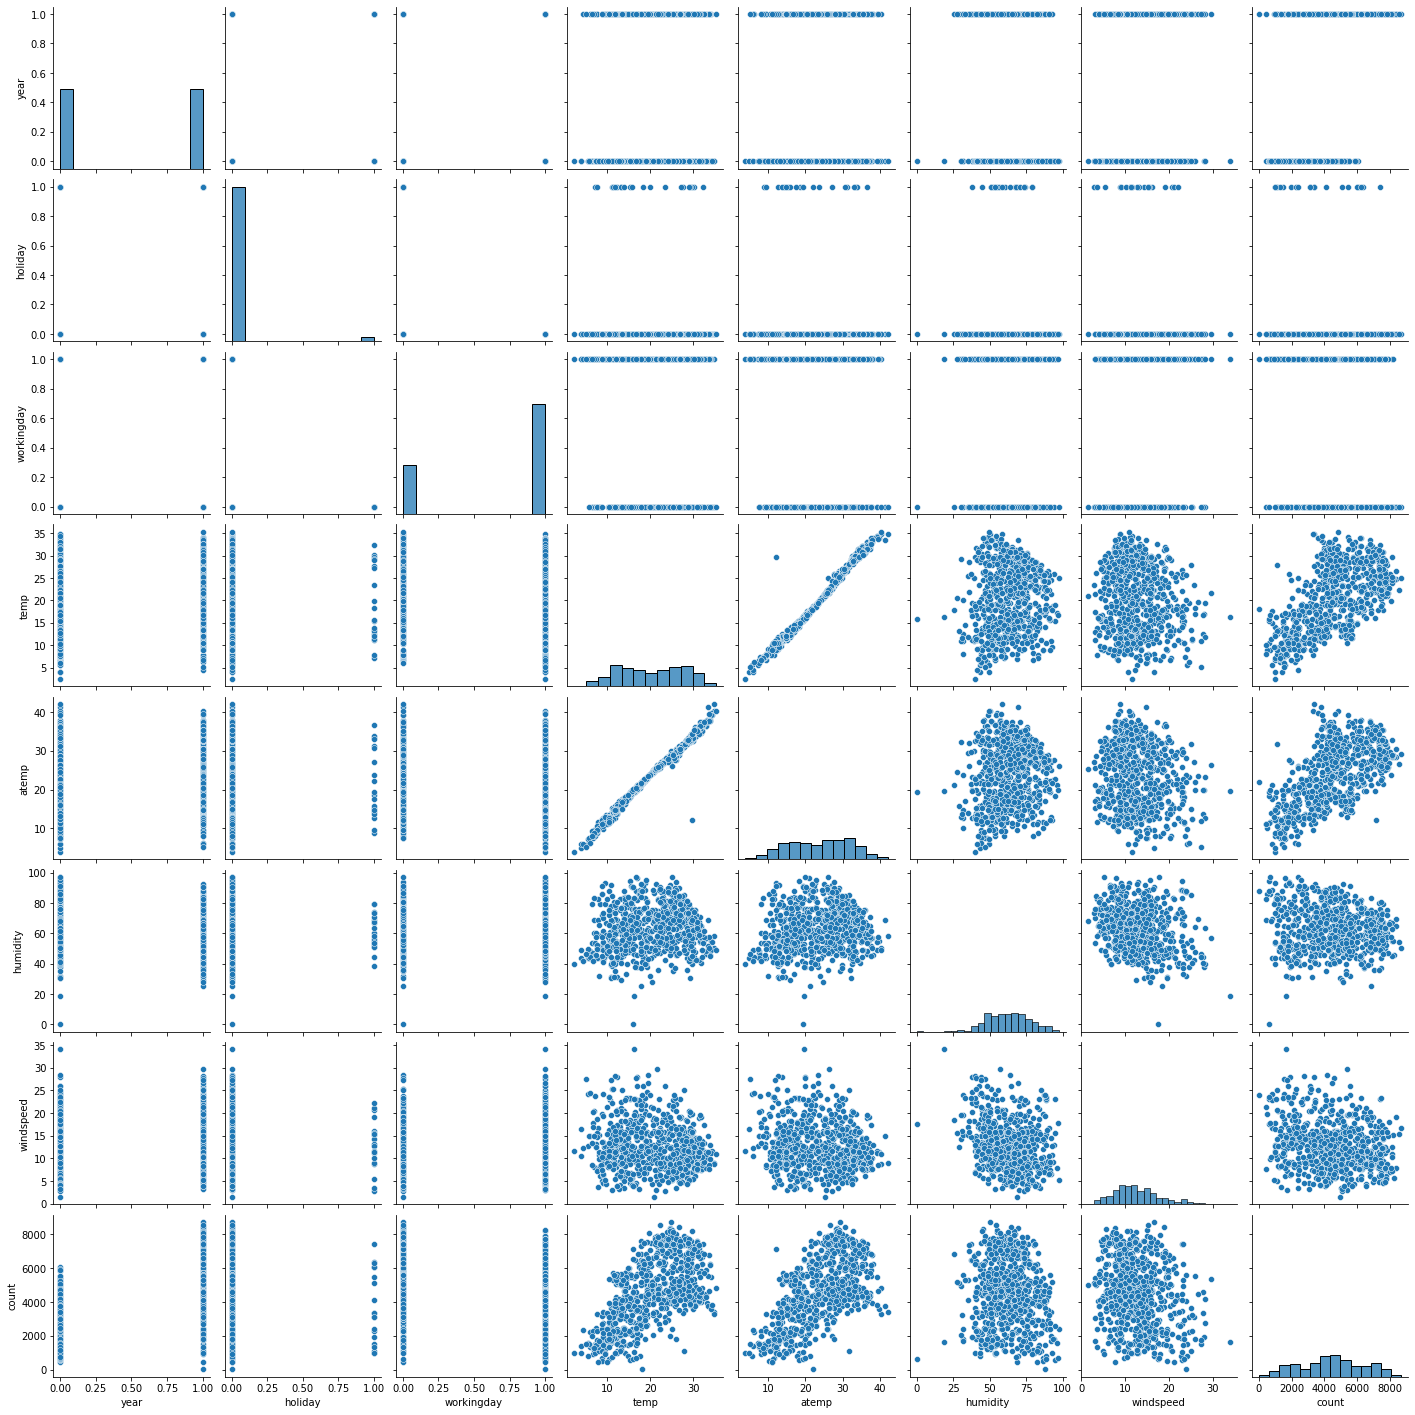

In [39]:
#Plot the heatmap to check relationships between numerical variables
sns.pairplot(df1)
plt.show()

We confirm that there is a strong relationship between temp and atemp (actual temperature and felt temperature), hence we can think about dropping one of the columns. We will check the correlation matrix and its heatmap to be absolutely sure that their relationship is indeed quite strong.

We see a slight relationship between temperature and count. Other than that, there seems to be no variable that is strongly related to any other. To confirm, we will look at the correlation matrix and heatmap.

What we have seen so far from the business perspective is that clear weather, and as a result summer and fall seasons have a better rental performance. Also, we see that rentals across the week remain similar.

In [40]:
df1.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count
year,1.000000,0.008195,-0.011852,0.048802,0.047218,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028760,-0.032696,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002010,0.010649,0.053770,-0.002453,-0.027640
temp,0.048802,-0.028760,0.002010,1.000000,0.991694,0.128550,-0.158167,0.627046
atemp,0.047218,-0.032696,0.010649,0.991694,1.000000,0.141521,-0.183890,0.630694
humidity,-0.112547,-0.015662,0.053770,0.128550,0.141521,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158167,-0.183890,-0.248506,1.000000,-0.235132
count,0.569728,-0.068764,-0.027640,0.627046,0.630694,-0.098543,-0.235132,1.000000


<AxesSubplot:>

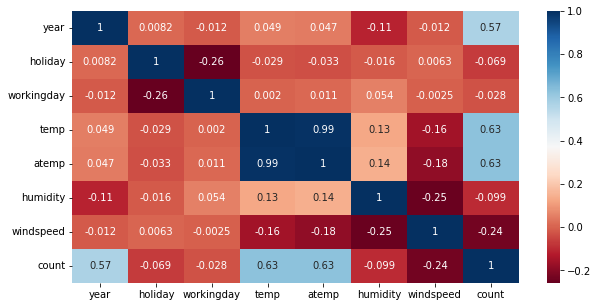

In [41]:
plt.figure(figsize=[10,5])
sns.heatmap(df1.corr(), cmap='RdBu', annot = True)

We see from the line graphs, pairplots, correlation matrix and heatmap that temp and atemp are very strongly correlated. Thus, we can drop one of the columns as they indicate a similar parameter. We feel that the actual temperature is slightly more accurate than the felt temperature, hence we will drop the 'atemp' column and keep the 'temp' column. Other than that, there are no columns that strongly influence any other.

In [42]:
df1=df1.drop('atemp', axis=1)

In [43]:
df1.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,spring,0,January,0,Monday,1,mist-cloudy,14.11,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,mist-cloudy,14.90,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,clear,8.05,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,clear,8.20,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,clear,9.31,43.6957,12.522300,1600
5,spring,0,January,0,Saturday,0,clear,8.38,51.8261,6.000868,1606
6,spring,0,January,0,Sunday,0,mist-cloudy,8.06,49.8696,11.304642,1510
7,spring,0,January,0,Monday,1,mist-cloudy,6.76,53.5833,17.875868,959
8,spring,0,January,0,Tuesday,1,clear,5.67,43.4167,24.250650,822
9,spring,0,January,0,Wednesday,1,clear,6.18,48.2917,14.958889,1321


We will plot the heatmap once again to see if there are any more columns that need attention, before we move onto the machine learning phase.

<AxesSubplot:>

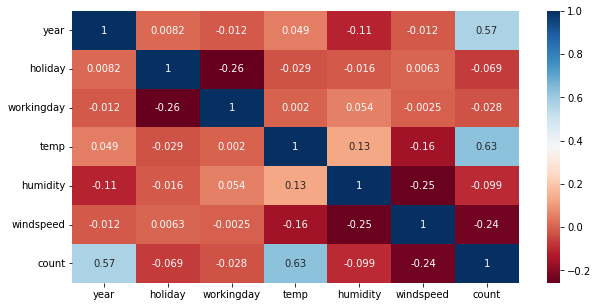

In [44]:
plt.figure(figsize=[10,5])
sns.heatmap(df1.corr(), cmap='RdBu', annot = True)

### Summary
In the exploratory data analysis phase:
- We analyse the categorical columns with the help of bar charts
- We analyse the numerical columns using histograms
- We analyse categorical variables against the target variable using boxplots
- We analyse the numerical variables against each other using pairplots and line graphs
- We analyse the correlations between the variables with the help of heatmap
- We drop the atemp column because it is highly correlated to temp and gives essentially the same information.

#### Business takeaways
- Clear weather, summer and fall months, non-holidays and recent years compared to past years show a positive trend towards bike rentals.

#### We see that there are no more columns that have a strong correlation between them. We have analysed the dataset and the columns separately (univariate) and in conjunction (multivariate) to see if one variable impacts any other. We find that in the final heatmap above, all variables are independent of each other. 

#### We can now move to the machine learning and linear regression phase where we use this cleaned and analysed dataset to build a model.

## PHASE 3: PRE-PROCESSING THE DATASET FOR MODEL BUILDING

### Creating dummies for the categorical variables season, month, weekday and weathersit

In [45]:
season_status = pd.get_dummies(df1['season'], drop_first=True)
month_status = pd.get_dummies(df1['month'], drop_first=True)
weekday_status = pd.get_dummies(df1['weekday'], drop_first=True)
weathersit_status = pd.get_dummies(df1['weathersit'], drop_first=True)

### Verify that dummies have been created along with dropping one column to optimise it to k-1 columns.

In [46]:
season_status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [47]:
month_status.head()

,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [48]:
weekday_status.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [49]:
weathersit_status.head()

,light snow-rain,mist-cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


### We will now concatenate the derived dummies into the dataset and remove the original columns which have now become redundant.

In [50]:
#concatenating the derived dummy variables with the dataset
df1=pd.concat([df1, season_status, month_status, weekday_status, weathersit_status], axis=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
0,spring,0,January,0,Monday,1,mist-cloudy,14.11,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,spring,0,January,0,Tuesday,1,mist-cloudy,14.90,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,spring,0,January,0,Wednesday,1,clear,8.05,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,spring,0,January,0,Thursday,1,clear,8.20,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,spring,0,January,0,Friday,1,clear,9.31,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,spring,0,January,0,Saturday,0,clear,8.38,51.8261,6.000868,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6,spring,0,January,0,Sunday,0,mist-cloudy,8.06,49.8696,11.304642,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
7,spring,0,January,0,Monday,1,mist-cloudy,6.76,53.5833,17.875868,959,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
8,spring,0,January,0,Tuesday,1,clear,5.67,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,spring,0,January,0,Wednesday,1,clear,6.18,48.2917,14.958889,1321,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [51]:
# dropping the columns for which the dummies have been added to the dataset
df1=df1.drop(['season', 'month', 'weekday', 'weathersit'], axis=1)
df1.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
0,0,0,1,14.11,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.90,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.05,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.20,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.31,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### We will now split the dataset 70:30 to form the training and testing dataset.
### We will also scale the numerical columns using the Min-Max scaler.

In [52]:
#Splitting the dataset into training and testing datasets at random
df_train, df_test = train_test_split(df1, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


In [53]:
#Scaling the numerical variables using the Min-Max method so that the values are all between 0 and 1
scaler = MinMaxScaler()
num_vars = ['temp', 'humidity', 'windspeed', 'count']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
576,1,0,1,0.815254,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442419,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245214,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395624,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345792,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [54]:
#Describe the scaled variables to see if the data has been scaled correctly
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537477,0.650480,0.320883,0.513499
std,0.225814,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339866,0.538643,0.199179,0.356420
50%,0.542692,0.653714,0.296763,0.518638
75%,0.735339,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


### We see from the description above that the numerical columns in the training dataset have been scaled properly since the minimum for all columns is now 'zero' and the maximum is 'one'.

<AxesSubplot:>

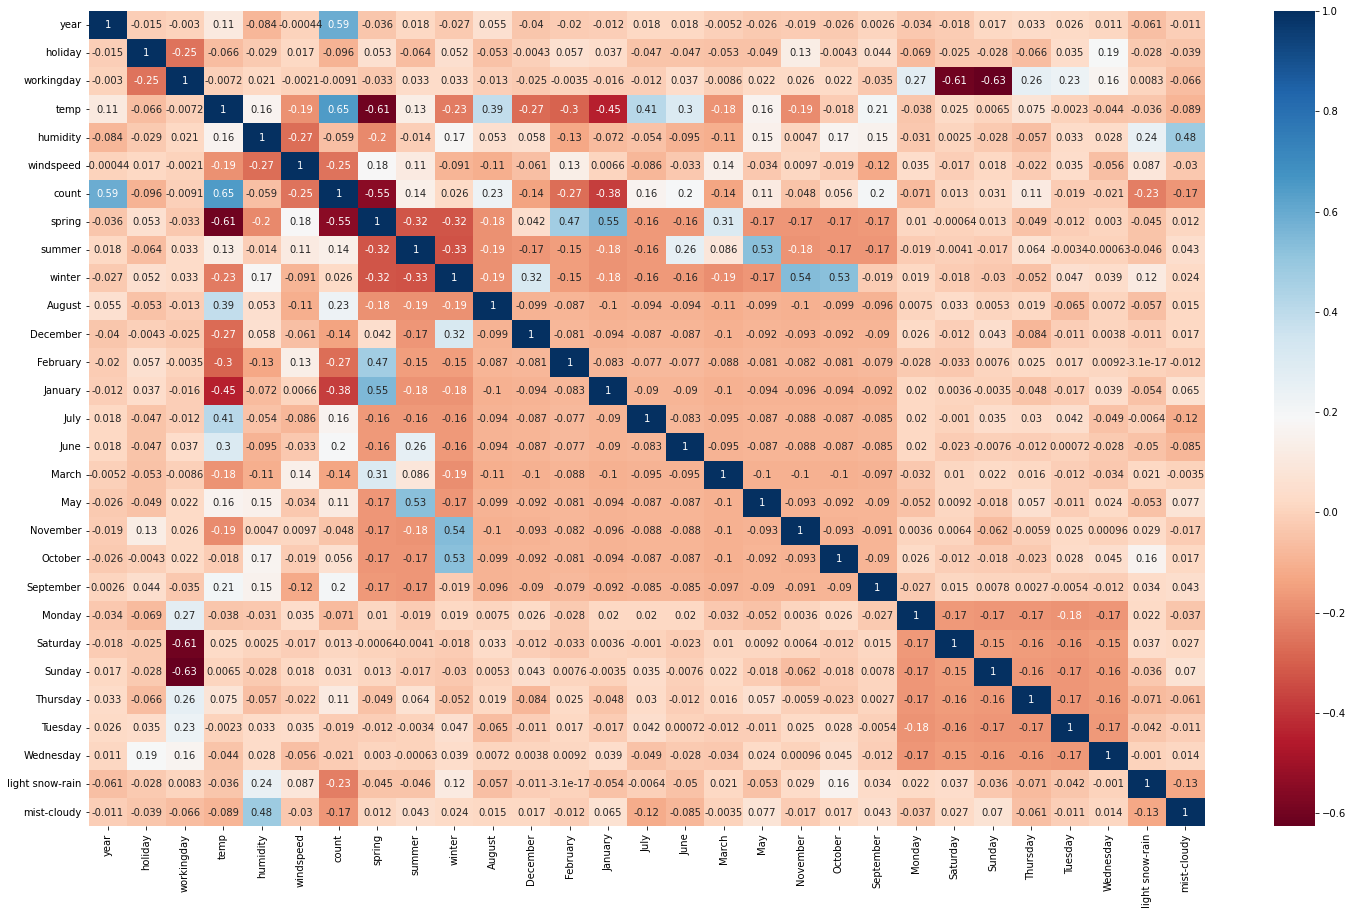

In [55]:
#Plot a heatmap of the dataset to see the correlations
plt.figure(figsize=[25,15])
sns.heatmap(df_train.corr(), annot=True, cmap='RdBu')

### Summary
In the pre processing phase:
- We created dummies for the categorical data
- We concatenated those dummies into the dataset
- We removed the redundant columns for which dummies are now present
- We scaled the numerical data using the Min-Max scaler
- We plot the heatmap to find visual cues of correaltion in the dataset

## PHASE 4: MODEL BUILDING USING LINEAR REGRESSION

In [56]:
# Split the training dataset into the target data (y_train) and the predictor variables (X_train)
y_train = df_train.pop('count')
X_train = df_train

In [57]:
# use RFE to automate variable selection for the model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [58]:
#list the result of RFE along with the ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('August', False, 4),
 ('December', True, 1),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 6),
 ('March', False, 9),
 ('May', False, 3),
 ('November', True, 1),
 ('October', False, 7),
 ('September', True, 1),
 ('Monday', False, 2),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', True, 1),
 ('Wednesday', False, 5),
 ('light snow-rain', True, 1),
 ('mist-cloudy', True, 1)]

In [59]:
# collect the columns given by RFE for modelling
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'December', 'February', 'January', 'July',
       'November', 'September', 'Saturday', 'Sunday', 'Tuesday',
       'light snow-rain', 'mist-cloudy'],
      dtype='object')

#### We now have 20 columns from the RFE stage to perform manual elmination through p-values and VIF.

In [60]:
#create a subset of the dataset in accordance with RFE results
X_train_rfe = X_train[col]

#### FIRST ITERATION

In [61]:
# build the linear regression model for the training dataset
X_train_rfe = sm.add_constant(X_train_rfe)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     136.5
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.94e-185
Time:                        21:31:06   Log-Likelihood:                 519.40
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     489   BIC:                            -907.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3800      0.081      4.712      0.000       0.222       0.538
year                0.2309      0.008     28.598      0.000       0.215       0.247
holiday            -0.1332      0.065     -2.037      0.042      -0.262      -0.005
workingday         -0.0553      0.071     -0.783      0.434      -0.194       0.084
temp                0.4630      0.038     12.147      0.000       0.388       0.538
humidity           -0.1510      0.038     -3.989      0.000      -0.225      -0.077
windspeed          -0.1866      0.026     -7.248      0.000      -0.237      -0.136
spring             -0.0516      0.022     -2.346      0.019      -0.095      -0.008
summer              0.0401      0.015      2.607      0.009       0.010       0.070
winter              0.1022      0.018      5.682      0.000       0.067       0.138
December           -0.0470      0.018     -2.565      0.011      -0.083      -0.011
February           -0.0348      0.022     -1.608      0.108      -0.077       0.008
January            -0.0627      0.021     -2.925      0.004      -0.105      -0.021
July               -0.0525      0.018     -2.881      0.004      -0.088      -0.017
November           -0.0418      0.019     -2.192      0.029      -0.079      -0.004
September           0.0736      0.017      4.372      0.000       0.041       0.107
Saturday           -0.0430      0.071     -0.609      0.543      -0.182       0.096
Sunday             -0.0370      0.070     -0.526      0.599      -0.175       0.101
Tuesday            -0.0186      0.011     -1.623      0.105      -0.041       0.004
light snow-rain    -0.2531      0.026     -9.582      0.000      -0.305      -0.201
mist-cloudy        -0.0577      0.010     -5.505      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       78.742   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.977
Skew:                          -0.804   Prob(JB):                     2.50e-41
Kurtosis:                       5.493   Cond. No.                         68.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#list the VIFs for each variable in the model
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
0,const,416.34
3,workingday,65.68
17,Sunday,37.63
16,Saturday,35.92
2,holiday,6.80
7,spring,5.70
4,temp,4.73
9,winter,3.85
8,summer,2.82
12,January,2.37


#### 'Sunday' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### SECOND ITERATION

In [63]:
X=X_train_rfe.drop('Sunday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     143.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.83e-186
Time:                        21:31:06   Log-Likelihood:                 519.25
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     490   BIC:                            -913.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3425      0.038     

#### 'Saturday' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### THIRD ITERATION

In [64]:
X=X_train_rfe.drop('Saturday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     152.1
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.61e-187
Time:                        21:31:06   Log-Likelihood:                 519.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     491   BIC:                            -919.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3394      0.037     

#### 'February' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### FOURTH ITERATION

In [65]:
X=X_train_rfe.drop('February', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     160.4
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          4.39e-188
Time:                        21:31:07   Log-Likelihood:                 517.84
No. Observations:                 510   AIC:                            -999.7
Df Residuals:                     492   BIC:                            -923.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3283      0.036     

#### 'Tuesday' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### FIFTH ITERATION

In [66]:
X=X_train_rfe.drop('Tuesday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.21e-188
Time:                        21:31:07   Log-Likelihood:                 516.49
No. Observations:                 510   AIC:                            -999.0
Df Residuals:                     493   BIC:                            -927.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3321      0.036     

#### 'spring' has the highest VIF, and all p-values are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### SIXTH ITERATION

In [67]:
X=X_train_rfe.drop('spring', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.7
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          5.98e-188
Time:                        21:31:07   Log-Likelihood:                 512.12
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     494   BIC:                            -924.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2678      0.029     

#### 'November' has the highest p-value, hence we drop that column from the dataset and rerun the model.

#### SEVENTH ITERATION

In [68]:
X=X_train_rfe.drop('November', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     189.8
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.32e-188
Time:                        21:31:07   Log-Likelihood:                 510.94
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     495   BIC:                            -928.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2621      0.029     

#### 'December' has the highest p-value, hence we drop that column from the dataset and rerun the mode

#### EIGHTH ITERATION

In [69]:
X=X_train_rfe.drop('December', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.0
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          2.09e-189
Time:                        21:31:08   Log-Likelihood:                 510.08
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     496   BIC:                            -932.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2560      0.029     

#### 'workingday' has the highest p-value, and all VIFs are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### NINTH ITERATION

In [70]:
X=X_train_rfe.drop('workingday', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.2
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.06e-189
Time:                        21:31:08   Log-Likelihood:                 507.97
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     497   BIC:                            -934.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2449      0.028     

#### 'January' has the highest p-value, and all VIFs are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### TENTH ITERATION

In [71]:
X=X_train_rfe.drop('January', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.0
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          7.04e-190
Time:                        21:31:08   Log-Likelihood:                 505.56
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     498   BIC:                            -936.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2262      0.027     

#### 'July' has the highest p-value, and all VIFs are in acceptable range, hence we drop that column from the dataset and rerun the model.

#### ELEVENTH ITERATION

In [72]:
X=X_train_rfe.drop('July', axis = 1)
X_train_rfe = sm.add_constant(X)
reg_1 = sm.OLS(y_train, X_train_rfe)
model_1 = reg_1.fit()
print(model_1.summary())

vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):          1.34e-189
Time:                        21:31:08   Log-Likelihood:                 502.01
No. Observations:                 510   AIC:                            -982.0
Df Residuals:                     499   BIC:                            -935.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2261      0.027     

__FINDINGS__<br>
1. F-Statistics tells us about significance of the model. Higher the F-Statistics value, more is the significance.<br>
F-Statistics: **256.9**

2. R-squared value : **0.837**

3. Adjusted R-squared value : **0.834**

__EQUATION OF THE BEST FIT LINE__<br>

count = 44.98 + 1.86 x (**humidity** + 1.55 x (**mist-cloudy**) + 1.27 x (**temp**) + 1.25 x (**winter**) + 1.23 x (**light snow-rain**) + 1.19 x (**summer**) + 1.18 x (**windspeed**) + 1.11 x (**September**) + 1.03 x (**year**) + 1.02 x (**holiday**)

### Summary
In the model building phase:
- We split the training dataset into predictors (X) and target (y)
- We use RFE to select the top 20 predictor variables
- We create a subset of the training dataset with the RFE supported columns
- We build a linear regression model and reiterate, whilst removing a variable after each iteration based on p-value and/or VIF.
- We reiterate till we get accepted p-values and VIF for all variables left in the model.
- We form an equation for the best fit line based on the model.

## PHASE 5: RESIDUAL ANALYSIS AND PREDICTIONS

In [73]:
#creating and storing the predicted target based on the model
y_train_pred = model_1.predict(X_train_rfe)

<AxesSubplot:ylabel='Density'>

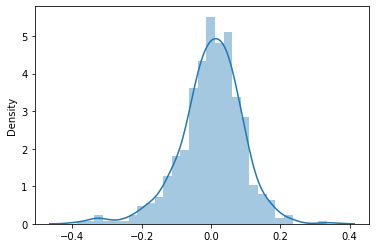

In [74]:
#calculating the residuals and analysing them
res = y_train - y_train_pred
sns.distplot(res)

#### We see that the residual terms have a mean around zero and it looks like they have a normal distribution. This assumption is acceptable for our model.

In [75]:
vif = pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range (X_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
print(vif)

           Features    VIF
0             const  44.98
4          humidity   1.86
10      mist-cloudy   1.55
3              temp   1.27
7            winter   1.25
9   light snow-rain   1.23
6            summer   1.19
5         windspeed   1.18
8         September   1.11
1              year   1.03
2           holiday   1.02


#### We see that leaving the coeffecient, there is low multicollinearity between predictor variables.

### We now have the final model with 10 variables and all variables left are significant (p-values) and show accepted levels of multicollinearity (VIF).

### We now move to the test dataset to see how the model performs when tasked with predicting from the test dataset.

### USING FINAL MODEL FOR PREDICTIONS

In [76]:
#transform the testing dataset as per the training dataset
num_vars = ['temp', 'humidity', 'windspeed', 'count']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
184,0,1,0,0.831662,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901246,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.512002,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881495,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817381,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [77]:
#check the transformations
df_test.describe()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558748,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233160,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046794,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355363,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558189,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756077,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984503,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### We see a marked difference in minimum and maximum values. While for the training dataset it was exactly 0 and 1 for all scaled values, it is not exactly 0 and 1 for some columns of the testing dataset. This is expected because the model trained on the training dataset, so it is most suited for that exact data.

In [78]:
#split the testing dataset into target(y) and predictor variables(X)
y_test = df_test.pop('count')
X_test = df_test

In [79]:
#add the statsmodels constant that is not implicitly provided by the statsmodels package
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light snow-rain,mist-cloudy
184,1.0,0,1,0,0.831662,0.657364,0.084219,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
535,1.0,1,0,1,0.901246,0.610133,0.153728,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,0,0.512002,0.837699,0.334206,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
221,1.0,0,0,1,0.881495,0.437098,0.339570,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817381,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [80]:
# create a list and store all the columns that need to be dropped in the testing dataset
l=[]
for column in X_train:
    if column not in X:
        l.append(column)

In [81]:
#drop the required columns from the testing dataset
X_test_sm = X_test_sm.drop(l, axis = 1)

In [82]:
#make predictions on the testing dataset
y_test_pred = model_1.predict(X_test_sm)

### Calculate the r2_score and the adjusted r2_score for the training and testing datasets

In [83]:
#calculate the r-squared value to find the accuracy of the model on the training dataset
print('Training set r- squared value: ',r2_score(y_train, y_train_pred))

#calculate the adjusted r-squared value for the training dataset
print('Training set adjusted r- squared:',1-(1-r2_score(y_train, y_train_pred))*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

#calculate the r-squared value to find the accuracy of the model on the testing dataset
print('Testing set r- squared value: ',r2_score(y_true=y_test, y_pred=y_test_pred))

#calculate the adjusted r-squared value for the testing dataset
print('Testing set adjusted r- squared:',1-(1-r2_score(y_test, y_test_pred))*(X_test_sm.shape[0]-1)/(X_test_sm.shape[0]-X_test_sm.shape[1]-1))

Training set r- squared value:  0.8373468274160424
Training set adjusted r- squared: 0.8337540866561558
Testing set r- squared value:  0.8051607708765054
Testing set adjusted r- squared: 0.7948567731824745


### FINAL RESULT<br>
- **TRAINING DATASET**
  - R-squared : **0.837**
  - Adjusted R-squared : **0.834**
  
  
- **TESTING DATASET**
  - R-squared : **0.805**
  - Adjusted R-squared : **0.795**

To answer the questions at the beginning of the assignment:

#### 1) Which variables are significant in predicting the demand for shared bikes?
    - The variables are:
      1. humidity
      2. mist-cloudy
      3. temp
      4. winter
      5. light snow-rain
      6. summer
      7. windspeed
      8. September
      9. year
      10. holiday

#### 2) How well those variables describe the bike demands?
    - The impact of each variable is as follows:
    -humidity ---> 1.86
    -mist-cloudy ---> 1.55
    -temp ---> 1.27
    -winter ---> 1.25
    -light snow-rain ---> 1.23
    -summer ---> 1.19
    -windspeed ---> 1.18
    -September ---> 1.11
    -year, and ---> 1.03
    -holiday ---> 1.02

### Business takeaway:

The business should look at the above mentioned variables and the impact they have on the overall number of rentals registered by BoomBikes. What we generally see is that this model is a good predictor of what might have the highest influence over rental numbers, indicated by the r-squared values for the testing dataset. Our model is ~80% accurate in predicting the best variables to look at for optimising the business and increasing revenue.

Our predictions state that seasons, year, weather conditions, temperature, humidity, windspeed and holidays, taken together are the best variables to predict and optimise the business of BoomBikes rentals.